# –ú–æ–¥—É–ª—å –ê. –ê–Ω–∞–ª–∏–∑ –∏ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

## –ò–º–ø–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –±–∏–±–ª–∏–æ—Ç–µ–∫

In [49]:
# –¥–ª—è —Ä–∞–±–æ—Ç—ã —Å –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞–º–∏
import pandas as pd

# –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
import matplotlib.pyplot as plt

# –¥–ª—è —Ä–∞–±–æ—Ç—ã —Å –º–∞—Å—Å–∏–≤–∞–º–∏
import numpy as np

# –¥–ª—è —Ä–∞–±–æ—Ç—ã —Å —Ñ–∞–π–ª–æ–≤–æ–π —Å–∏—Å—Ç–µ–º–æ–π
import os, shutil

# –º–æ–¥—É–ª—å —Å–æ —Å–ª–æ–≤–∞—Ä—è–º–∏
from collections import defaultdict

# –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –ø—Ä–æ–≥—Ä–µ—Å—Å-–±–∞—Ä–∞
from tqdm import tqdm

# nlp –±–∏–±–ª–∏–æ—Ç–µ–∫–∞
import nltk
# –º–æ–¥—É–ª—å —Å–æ —Å—Ç–æ–ø —Å–ª–æ–≤–∞–º–∏
from nltk.corpus import stopwords

# –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –æ–±–ª–∞–∫–æ–≤ —Å–ª–æ–≤
from wordcloud import WordCloud

# –º–æ–¥—É–ª—å —Å —Ä–µ–≥—É–ª—è—Ä–Ω—ã–º–∏ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è–º–∏
import re

# –¥–ª—è —Ä–∞–±–æ—Ç—ã —Å–æ —Å—Ç—Ä–æ–∫–∞–º–∏
import string

# 
from datasets import Dataset, DatasetDict

# –≤—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏ 
from function import *

#
from transformers import T5Tokenizer

#
import evaluate

In [4]:
# –ü—Ä–∏–º–µ–Ω—è–µ–º —Å—Ç–∏–ª—å dark_background
plt.style.use('dark_background')

In [5]:
# –°–∫–∞—á–∏–≤–∞–µ–º —Å—Ç–æ–ø-—Å–ª–æ–≤–∞ –¥–ª—è —Ä—É—Å—Å–∫–æ–≥–æ —è–∑—ã–∫–∞
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ —Å—Ç–æ–ø-—Å–ª–æ–≤
stop_words.update({"–≤","–∏","–∞","–∫","—Å","–ø–æ","–Ω–∞","–¥–ª—è","—ç—Ç–æ","—Å"})

### –§—É–Ω–∫—Ü–∏–∏

–í—Å–µ —Ñ—É–Ω–∫—Ü–∏–∏ —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω—ã –≤ —Ñ–∞–π–ª–µ `function.py`

```py
# –ø—Ä–æ—Ü–µ–¥—É—Ä–∞ –¥–ª—è –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –æ–±–ª–∞–∫–∞ —Å–ª–æ–≤
def generate_wordcoud(text: str, color: str = 'black'):
    '''–ü—Ä–æ—Ü–µ–¥—É—Ä–∞ –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –æ–±–ª–∞–∫–∞ —Å–ª–æ–≤'''
    # —Å–æ–∑–¥–∞–µ–º –æ–±—ä–µ–∫—Ç - –æ–±–ª–∞–∫–æ —Å–ª–æ–≤
    wordcloud = WordCloud(
        width=800,              # —à–∏—Ä–∏–Ω–∞
        height=400,             # –≤—ã—Å–æ—Ç–∞
        background_color=color  # —Ü–≤–µ—Ç —Ñ–æ–Ω–∞
    ).generate(text)
    
    # –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –æ–±–ª–∞–∫–∞ —Å–ª–æ–≤–∞
    plt.figure(figsize=(10,5))                          # —Ä–∞–∑–º–µ—Ä —Ñ–∏–≥—É—Ä—ã
    plt.imshow(wordcloud, interpolation='bilinear')     # –∑–∞–≥—Ä—É–∂–∞–µ–º –æ–±—ä–µ–∫—Ç –¥–ª—è –≤—ã–≤–æ–¥–∞
    plt.axis('off')                                     # –æ—Ç–∫–ª—é—á–∞–µ–º —Å–µ—Ç–∫—É
    plt.show()                                          # –≤—ã–≤–æ–¥ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
    
```

```py
# —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è —á–∏—Å—Ç–∫–∏ —Å—Ç–æ–ø —Å–ª–æ–≤
def clean_text(text: str, stop_words: set):
    '''
    –§—É–Ω–∫—Ü–∏—è –¥–ª—è —á–∏—Å—Ç–∫–∏ —Ç–µ–∫—Å—Ç–∞ –æ—Ç —Å—Ç–æ–ø —Å–ª–æ–≤
        Args:
            - test (str): —Ç–µ–∫—Å—Ç, –∫–æ—Ç–æ—Ä—ã–π –Ω—É–∂–Ω–æ –ø–æ—á–∏—Å—Ç–∏—Ç—å –æ—Ç —Å—Ç–æ–ø —Å–ª–æ–≤
            - stop_words (set): –º–Ω–æ–∂–µ—Å—Ç–≤–æ —Å—Ç–æ–ø —Å–ª–æ–≤
        Returns:
            - –æ—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–Ω–Ω—ã–π —Ç–µ–∫—Å—Ç (str)
    '''
    # —Å–æ–∑–¥–∞–µ–º —Å–ø–∏—Å–æ–∫ —Å–ª–æ–≤ –∏—Å–ø–æ–ª—å–∑—É—è split()
    words = text.split()
    # —Ñ–∏–ª—å—Ç—Ä—É–µ–º —Å–ª–æ–≤–∞ –∏—Å–ø–æ–ª—å–∑—É—è –∑–∞–¥–∞–Ω–Ω–æ–µ –º–Ω–æ–∂–µ—Å—Ç–≤–æ
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # –≤–æ–∑–≤—Ä–∞—â–∞–µ–º –ø–æ—á–∏—â–µ–Ω–Ω—ã–π —Ç–µ–∫—Å—Ç
    return ' '.join(filtered_words)
```

```py
# —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –≥—Ä–∞—Ñ–∏–∫–æ–≤
def see_distribution(data_stats: dict, 
                     title: str = 'Values distribution',
                     xlabel: str = 'Keys',
                     ylabel: str = 'Values',
                     color: str = 'lightblue',
                     graph_type: str = 'bar',
                     grid: bool = True,
                     meta: bool = True
                     ):
    '''
    –ü—Ä–æ—Ü–µ–¥—É—Ä–∞ –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –≥—Ä–∞—Ñ–∏–∫–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö
        Args:
        - data_stats (dict): —Å–ª–æ–≤–∞—Ä—å —Å —Å–æ–±—Ä–∞–Ω–Ω–æ–π —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–æ–π
        - title (str): –Ω–∞–∑–≤–∞–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
        - xlabel (str): –Ω–∞–∑–≤–∞–Ω–∏–µ –∏–∫—Å–∞
        - ylabel (str): –Ω–∞–∑–≤–∞–Ω–∏–µ –∏–≥—Ä–∏–∫–∞
        - color (str): —Ü–≤–µ—Ç –≥—Ä–∞—Ñ–∏–∫–∞
        - grid (bool): –≤–∫–ª—é—á–µ–Ω–∏–µ —Å–µ—Ç–∫–∏
        - meta (bool): –≤–∫–ª—é—á–µ–Ω–∏–µ –º–µ—Ç–∞–∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏
    '''
    # –ø–∞—Ä—Å–∏–º –≤—Ö–æ–¥–Ω–æ–π —Å–ª–æ–≤–∞—Ä—å
    x, y = data_stats.keys(), data_stats.values()
    
    plt.figure(figsize=(10,5))      # —Ä–∞–∑–º–µ—Ä —Ñ–∏–≥—É—Ä—ã
    # –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —Ç–∏–ø–∞ –≥—Ä–∞—Ñ–∏–∫–∞, —Å—Ç—Ä–æ–∏–º –Ω—É–∂–Ω—ã–π
    match graph_type:
        # –µ—Å–ª–∏ —Ç–∏–ø –≥—Ä–∞—Ñ–∏–∫–∞ - bar
        case 'bar':
            plt.bar(x, y, color=color)      # —Ç–∏–ø –≥—Ä–∞—Ñ–∏–∫–∞
        # –µ—Å–ª–∏ —Ç–∏–ø –≥—Ä–∞—Ñ–∏–∫–∞ - plot   
        case 'plot':
            plt.plot(x, y, color=color)     # —Ç–∏–ø –≥—Ä–∞—Ñ–∏–∫–∞
        # –µ—Å–ª–∏ —Ç–∏–ø –≥—Ä–∞—Ñ–∏–∫–∞ - plot   
        case 'scatter':
            plt.scatter(x, y, color=color)     # —Ç–∏–ø –≥—Ä–∞—Ñ–∏–∫–∞


    # –Ω–∞—Å—Ç—Ä–∞–∏–≤–∞–µ–º –≥—Ä–∞—Ñ–∏–∫
    plt.title(title)                # –Ω–∞–∑–≤–∞–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
    plt.xlabel(xlabel)              # –ø–æ–¥–ø–∏—Å—å –∫ –∏–∫—Å—É
    plt.ylabel(ylabel)              # –ø–æ–¥–ø–∏—Å—å –∫ –∏–≥—Ä–∏–∫—É

    # –µ—Å–ª–∏ –≤–∫–ª—é—á–µ–Ω–∞ —Å–µ—Ç–∫–∞
    if grid:
        # –≤–∫–ª—é—á–∞–µ–º —Å–µ—Ç–∫—É
        plt.grid(True)

    plt.show()                      # –≤—ã–≤–æ–¥ –≥—Ä–∞—Ñ–∏–∫–∞

    # –µ—Å–ª–∏ –≤–∫–ª—é—á–µ–Ω –≤—ã–≤–æ–¥ –º–µ—Ç–∞–∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏
    if meta:
        # –≤—Å–µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏–π
        print(f'Counts: {len(x)}')
        # –≤—ã–≤–æ–¥ –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è
        print(f'Min: {min(y)}')
        # –≤—ã–≤–æ–¥ —Å—Ä–µ–¥–Ω–µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è
        print(f'Mean: {sum(y)/len(y):.2f}')
        # –≤—ã–≤–æ–¥ –º–∞–∫—Å–º–∏–∞–ª—å–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è
        print(f'Max: {max(y)}')
```

In [7]:
# —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ–∫–∞–∑–∞ –ø—Ä–∏–º–µ—Ä–æ–≤
def show_samples(dataset, num_samples: int = 3, seed: int = 42):
    # —Å–æ–±–∏—Ä–∞–µ–º —É–∫–∞–∑–∞–Ω–Ω–æ–µ –∫–æ–ª-–≤–æ –ø—Ä–∏–º–µ—Ä–æ–≤
    samples = dataset['train'].shuffle(seed=seed).select(range(num_samples))
    # –ø—Ä–æ—Ö–æ–¥–∏–º—Å—è –ø–æ –∫–∞–∂–¥–æ–º—É –ø—Ä–∏–º–µ—Ä—É
    for sample in samples:
        # –≤—ã–≤–æ–¥ –ø—Ä–∏–º–µ—Ä–æ–≤
        print(f">> –°—Ç–∞—Ç—å—è: {sample['text'][:200]}...")
        print(f">> –ê–Ω–Ω–æ—Ç–∞—Ü–∏—è: {sample['summary']}")


## –ê–Ω–∞–ª–∏–∑ –∏ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω—ã—Ö

–°–æ–∑–¥–∞–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º, –∫—É–¥–∞ –ø–æ–º–µ—â—É –ø—É—Ç–∏ –∫–æ –≤—Å–µ–º —Ñ–∞–π–ª–∞–º

In [8]:
# –ø—É—Ç—å –∫ –æ—Å–Ω–æ–≤–Ω–æ–π –ø–∞–ø–∫–µ —Å –¥–∞–Ω–Ω—ã–º–∏
data_dir = '../Data/DATASET/'
# –ª–æ–≥–∏—Ä–æ–≤–∞–Ω–∏–µ
print(os.path.exists(data_dir))
print(len(os.listdir(data_dir)))

True
1002


In [9]:
# –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ
dataset = Dataset.from_list(reorganize_dataset("../Data/DATASET/"))
dataset

Dataset({
    features: ['text_path', 'annotation_path', 'tags_path', 'text', 'summary', 'tag', 'text_all_symb', 'summary_all_symb', 'tag_all_symb', 'text_clean', 'summary_clean', 'tag_clean', 'text_words', 'summary_words', 'tag_words', 'id'],
    num_rows: 1002
})

In [10]:
df = pd.DataFrame(dataset)
df.head()

text_path                      annotation_path  \
0     ../Data/DATASET/1\text.txt     ../Data/DATASET/1\annotation.txt   
1    ../Data/DATASET/10\text.txt    ../Data/DATASET/10\annotation.txt   
2   ../Data/DATASET/100\text.txt   ../Data/DATASET/100\annotation.txt   
3  ../Data/DATASET/1000\text.txt  ../Data/DATASET/1000\annotation.txt   
4  ../Data/DATASET/1001\text.txt  ../Data/DATASET/1001\annotation.txt   

                       tags_path  \
0     ../Data/DATASET/1\tags.txt   
1    ../Data/DATASET/10\tags.txt   
2   ../Data/DATASET/100\tags.txt   
3  ../Data/DATASET/1000\tags.txt   
4  ../Data/DATASET/1001\tags.txt   

                                                text  \
0  –í–∞–∂–Ω–µ–π—à–∏–º –≤–æ–ø—Ä–æ—Å–æ–º –¥–ª—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–∏ –æ–±—É—á–µ–Ω–∏—è —è–≤...   
1  –§—Ä–µ–π–º–≤–æ—Ä–∫ - —ç—Ç–æ –Ω–∞–±–æ—Ä –∫–æ–Ω—Ü–µ–ø—Ç—É–∞–ª—å–Ω–æ–π —Å—Ç—Ä—É–∫—Ç—É—Ä—ã...   
2  –í —Å–æ–≤—Ä–µ–º–µ–Ω–Ω–æ–º –º–∏—Ä–µ —Ü–∏—Ñ—Ä–æ–≤–∞—è —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏—è —Å—Ç–∞–ª...   
3  –†–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É ASP.NET –∏ PHP\nASP.NET - —ç—Ç–æ —Å–µ—Ä...   
4  –í—Å–µ–º—É –º–∏—Ä—É –∏–∑–≤–µ—Å—Ç–µ–Ω –¥–∞–Ω–Ω—ã–π –º–æ–¥–Ω—ã–π –¥–æ–º, –∫–∞–∂–¥–∞—è ...   

                                             summary  \
0  –í —ç–ª–µ–∫—Ç—Ä–æ–Ω–Ω–æ–º —É—á–µ–±–Ω–∏–∫–µ –∏–∑–ª–æ–∂–µ–Ω—ã –æ—Å–Ω–æ–≤–Ω—ã–µ —Ä–∞–∑–¥–µ...   
1  –í —ç—Ç–æ–π —Å—Ç–∞—Ç—å–µ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–µ—Ç—Å—è Laravel - PHP-—Ñ—Ä...   
2  –¢–µ–º–∞ —Ñ–∏–Ω–∞–Ω—Å–æ–≤–æ–π –∫–∏–±–µ—Ä–±–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç–∏ –≤ —É—Å–ª–æ–≤–∏—è—Ö —Ü...   
3  –í —Å—Ç–∞—Ç—å–µ –æ–ø–∏—Å–∞–Ω–∞ —Ä–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Å–µ—Ä–≤–µ—Ä–Ω–æ–π –≤–µ–±-–ø...   
4  –ö–∞–∫ –ø–æ—è–≤–∏–ª–æ—Å—å –∏–º—è –ö–æ–∫–æ –®–∞–Ω–µ–ª—å? –ö—Ç–æ –æ–Ω–∞, —Å–æ–∑–¥–∞—Ç...   

                                                 tag  text_all_symb  \
0  –ë–ê–ó–ê –î–ê–ù–ù–´–•, MACROMEDIA FLASH, LIBRARY, ACTION...           5160   
1  –†–ê–ó–†–ê–ë–û–¢–ö–ê, BACK-END –†–ê–ó–†–ê–ë–û–¢–ö–ê, –ó–ê–ü–†–û–°–´, –°–ï–†–í...           6075   
2  –§–ò–®–ò–ù–ì, –ö–ò–ë–ï–†–ë–ï–ó–û–ü–ê–°–ù–û–°–¢–¨, –¶–ò–§–†–û–í–´–ï –¢–ï–•–ù–û–õ–û–ì–ò–ò...           6692   
3                ASP.NET, PHP, –†–ê–ó–õ–ò–ß–ò–Ø, DIFFERENCES           5525   
4  –ö–û–ö–û –®–ê–ù–ï–õ–¨, –ú–û–î–ê XX –í–ï–ö–ê, –î–£–•–ò CHANEL ‚Ññ 5, –ú–ê...          12202   

   summary_all_symb  tag_all_symb  text_clean  summary_clean  tag_clean  \
0               379            52        5061            374         49   
1               212            62        5917            205         58   
2               569            67        6586            564         64   
3               172            35        5356            166         31   
4               226            68       11905            220         65   

   text_words  summary_words  tag_words    id  
0         620             45          6     1  
1         745             27          6    10  
2         794             69          6   100  
3         710             21          4  1000  
4        1846             35         12  1001

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >], dtype=object)

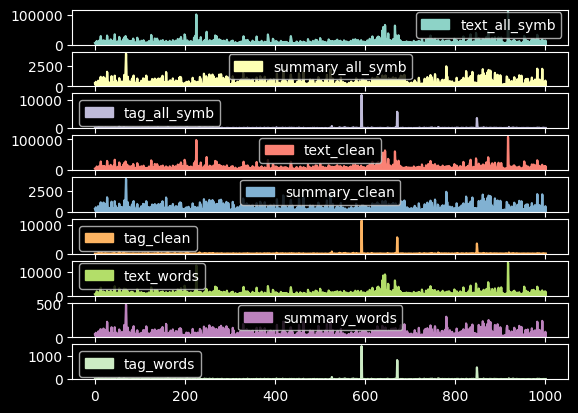

In [11]:
df.plot(kind='area', subplots=True)

–ù–∞ –¥–∞–Ω–Ω—ã–π –º–æ–º–µ–Ω—Ç –¥–∞—Ç–∞—Å–µ—Ç –≤—ã–≥–ª—è–¥–∏—Ç –¥–æ–≤–æ–ª—å–Ω–æ —Ä–∞–∑—Ä–æ–∑–Ω–µ–Ω–Ω–æ, –ø–æ—ç—Ç–æ–º—É –µ–≥–æ –Ω–∞–¥–æ –æ—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞—Ç—å –¥–ª—è –ª—É—á—à–µ–≥–æ –∫–∞—á–µ—Å—Ç–≤–∞ –¥–∞–Ω–Ω—ã—Ö

### –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è

In [13]:
annot_df = df[['summary_all_symb', 'summary_clean']]
annot_df.describe()

summary_all_symb  summary_clean
count       1002.000000    1002.000000
mean         494.934132     485.199601
std          390.030148     382.093134
min            0.000000       0.000000
25%          243.000000     240.000000
50%          380.500000     374.000000
75%          606.000000     593.000000
max         4082.000000    4007.000000

In [14]:
# —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏
def df_filter(df: pd.DataFrame, column: str, upper: float = 0.95, lower: float = 0.05):
    '''–§—É–Ω–∫—Ü–∏—è –¥–ª—è —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ –¥–∞—Ç–∞—Å–µ—Ç–∞ –ø–æ –∫–≤–∞—Ä—Ç–∏–ª—è–º'''
    #
    upper_bound = df[column].quantile(upper)
    #
    lower_bound = df[column].quantile(lower)

    #
    filtered_df = df[
        (df[column] >= lower_bound) & (df[column] <=upper_bound)
    ]
    
    #
    return filtered_df.dropna()

In [15]:
print(f'–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –¥–æ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏: {df.shape}')

#
filtered_df = df.copy(deep=False)
#
for column in df.columns:
    #
    if 'int64' == df[column].dtype:
        filtered_df = df_filter(filtered_df, column)
    else:
        print(column)


print(f'–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –ø–æ—Å–ª–µ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏: {filtered_df.shape}')
filtered_df.head()

–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –¥–æ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏: (1002, 16)
text_path
annotation_path
tags_path
text
summary
tag
id
–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –ø–æ—Å–ª–µ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏: (412, 16)


text_path                      annotation_path  \
0     ../Data/DATASET/1\text.txt     ../Data/DATASET/1\annotation.txt   
1    ../Data/DATASET/10\text.txt    ../Data/DATASET/10\annotation.txt   
2   ../Data/DATASET/100\text.txt   ../Data/DATASET/100\annotation.txt   
3  ../Data/DATASET/1000\text.txt  ../Data/DATASET/1000\annotation.txt   
5  ../Data/DATASET/1002\text.txt  ../Data/DATASET/1002\annotation.txt   

                       tags_path  \
0     ../Data/DATASET/1\tags.txt   
1    ../Data/DATASET/10\tags.txt   
2   ../Data/DATASET/100\tags.txt   
3  ../Data/DATASET/1000\tags.txt   
5  ../Data/DATASET/1002\tags.txt   

                                                text  \
0  –í–∞–∂–Ω–µ–π—à–∏–º –≤–æ–ø—Ä–æ—Å–æ–º –¥–ª—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–∏ –æ–±—É—á–µ–Ω–∏—è —è–≤...   
1  –§—Ä–µ–π–º–≤–æ—Ä–∫ - —ç—Ç–æ –Ω–∞–±–æ—Ä –∫–æ–Ω—Ü–µ–ø—Ç—É–∞–ª—å–Ω–æ–π —Å—Ç—Ä—É–∫—Ç—É—Ä—ã...   
2  –í —Å–æ–≤—Ä–µ–º–µ–Ω–Ω–æ–º –º–∏—Ä–µ —Ü–∏—Ñ—Ä–æ–≤–∞—è —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏—è —Å—Ç–∞–ª...   
3  –†–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É ASP.NET –∏ PHP\nASP.NET - —ç—Ç–æ —Å–µ—Ä...   
5  –ü—Ä–∏ —Ä–∞–∑—Ä–∞–±–æ—Ç–∫–µ –≤–µ–±-—Å–∞–π—Ç–∞ –ø–µ—Ä–µ–¥ –ª—é–±—ã–º —Ä–∞–∑—Ä–∞–±–æ—Ç—á...   

                                             summary  \
0  –í —ç–ª–µ–∫—Ç—Ä–æ–Ω–Ω–æ–º —É—á–µ–±–Ω–∏–∫–µ –∏–∑–ª–æ–∂–µ–Ω—ã –æ—Å–Ω–æ–≤–Ω—ã–µ —Ä–∞–∑–¥–µ...   
1  –í —ç—Ç–æ–π —Å—Ç–∞—Ç—å–µ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–µ—Ç—Å—è Laravel - PHP-—Ñ—Ä...   
2  –¢–µ–º–∞ —Ñ–∏–Ω–∞–Ω—Å–æ–≤–æ–π –∫–∏–±–µ—Ä–±–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç–∏ –≤ —É—Å–ª–æ–≤–∏—è—Ö —Ü...   
3  –í —Å—Ç–∞—Ç—å–µ –æ–ø–∏—Å–∞–Ω–∞ —Ä–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Å–µ—Ä–≤–µ—Ä–Ω–æ–π –≤–µ–±-–ø...   
5  –í –¥–∞–Ω–Ω–æ–π —Å—Ç–∞—Ç—å–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω –º–µ—Ç–æ–¥ —Ä–∞–∑—Ä–∞–±–æ—Ç–∫–∏ –≤...   

                                                 tag  text_all_symb  \
0  –ë–ê–ó–ê –î–ê–ù–ù–´–•, MACROMEDIA FLASH, LIBRARY, ACTION...           5160   
1  –†–ê–ó–†–ê–ë–û–¢–ö–ê, BACK-END –†–ê–ó–†–ê–ë–û–¢–ö–ê, –ó–ê–ü–†–û–°–´, –°–ï–†–í...           6075   
2  –§–ò–®–ò–ù–ì, –ö–ò–ë–ï–†–ë–ï–ó–û–ü–ê–°–ù–û–°–¢–¨, –¶–ò–§–†–û–í–´–ï –¢–ï–•–ù–û–õ–û–ì–ò–ò...           6692   
3                ASP.NET, PHP, –†–ê–ó–õ–ò–ß–ò–Ø, DIFFERENCES           5525   
5  –ü–†–û–ì–†–ê–ú–ú–ò–†–û–í–ê–ù–ò–ï, –í–ï–ë-–ü–†–û–ì–†–ê–ú–ú–ò–†–û–í–ê–ù–ò–ï, –ë–ê–ó–ê –î...           6776   

   summary_all_symb  tag_all_symb  text_clean  summary_clean  tag_clean  \
0               379            52        5061            374         49   
1               212            62        5917            205         58   
2               569            67        6586            564         64   
3               172            35        5356            166         31   
5               301           107        6580            295         99   

   text_words  summary_words  tag_words    id  
0         620             45          6     1  
1         745             27          6    10  
2         794             69          6   100  
3         710             21          4  1000  
5         867             38         11  1002

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >], dtype=object)

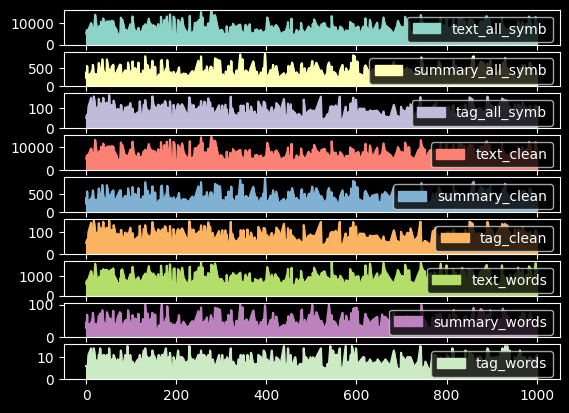

In [16]:
filtered_df.plot(kind='area', subplots=True)

In [17]:
filtered_df.describe()

text_all_symb  summary_all_symb  tag_all_symb    text_clean  \
count     412.000000        412.000000    412.000000    412.000000   
mean     7569.475728        403.148058     86.716019   7347.720874   
std      2457.748414        158.165133     30.093276   2406.313019   
min      3452.000000        165.000000     32.000000   3352.000000   
25%      5611.750000        281.000000     63.750000   5398.750000   
50%      7237.000000        372.000000     83.000000   6924.500000   
75%      8985.250000        495.000000    108.000000   8774.500000   
max     15207.000000        924.000000    166.000000  14695.000000   

       summary_clean   tag_clean   text_words  summary_words   tag_words  
count     412.000000  412.000000   412.000000     412.000000  412.000000  
mean      395.873786   81.609223   938.662621      47.439320    8.449029  
std       155.269889   28.696842   295.718820      18.649507    2.788545  
min       162.000000   31.000000   490.000000      21.000000    4.000000  
25%       276.500000   59.750000   703.250000      32.000000    6.000000  
50%       366.000000   78.500000   876.000000      44.000000    8.000000  
75%       485.000000  102.000000  1122.500000      58.000000   10.000000  
max       911.000000  153.000000  1726.000000     101.000000   15.000000

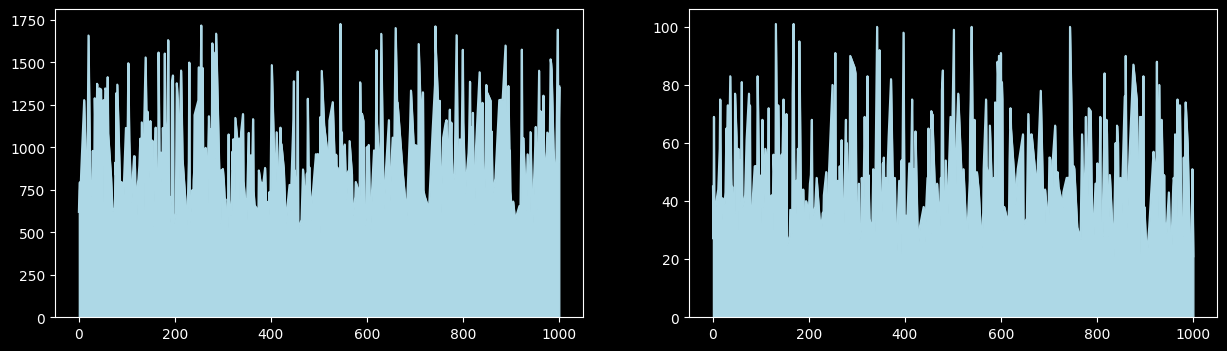

In [28]:
#
fig, ax = plt.subplots(1,2, figsize=(15,4))
#
filtered_df['text_words'].plot(kind='area', color='lightblue', ax=ax[0])
#
filtered_df['summary_words'].plot(kind='area', color='lightblue', ax=ax[1])
plt.show()

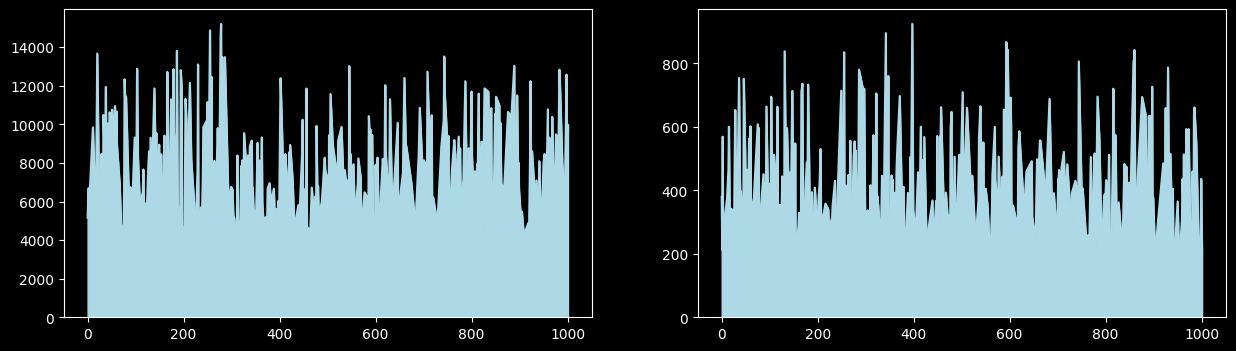

In [29]:
#
fig, ax = plt.subplots(1,2, figsize=(15,4))
#
filtered_df['text_all_symb'].plot(kind='area', color='lightblue', ax=ax[0])
#
filtered_df['summary_all_symb'].plot(kind='area', color='lightblue', ax=ax[1])
plt.show()

In [32]:
filtered_df['summary_all_symb'].describe()

count    412.000000
mean     403.148058
std      158.165133
min      165.000000
25%      281.000000
50%      372.000000
75%      495.000000
max      924.000000
Name: summary_all_symb, dtype: float64

In [19]:
samples = filtered_df.to_dict('records')

In [20]:
dataset_fin = split_dataset(samples)
dataset_fin

DatasetDict({
    train: Dataset({
        features: ['text_path', 'annotation_path', 'tags_path', 'text', 'summary', 'tag', 'text_all_symb', 'summary_all_symb', 'tag_all_symb', 'text_clean', 'summary_clean', 'tag_clean', 'text_words', 'summary_words', 'tag_words', 'id'],
        num_rows: 329
    })
    validation: Dataset({
        features: ['text_path', 'annotation_path', 'tags_path', 'text', 'summary', 'tag', 'text_all_symb', 'summary_all_symb', 'tag_all_symb', 'text_clean', 'summary_clean', 'tag_clean', 'text_words', 'summary_words', 'tag_words', 'id'],
        num_rows: 41
    })
    test: Dataset({
        features: ['text_path', 'annotation_path', 'tags_path', 'text', 'summary', 'tag', 'text_all_symb', 'summary_all_symb', 'tag_all_symb', 'text_clean', 'summary_clean', 'tag_clean', 'text_words', 'summary_words', 'tag_words', 'id'],
        num_rows: 42
    })
})

In [21]:
model_checkpoint = 'google/mt5-small'
tokenizer = T5Tokenizer.from_pretrained(model_checkpoint)

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [22]:
inputs = tokenizer('I loved reading the Hunger Games!')
inputs

{'input_ids': [336, 259, 28387, 11807, 287, 62893, 295, 12507, 309, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [25]:
#
tokenizer.convert_ids_to_tokens(inputs.input_ids)

['‚ñÅI', '‚ñÅ', 'loved', '‚ñÅreading', '‚ñÅthe', '‚ñÅHung', 'er', '‚ñÅGames', '!', '</s>']

–î–ª—è —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏–∏ –Ω–∞—à–µ–≥–æ –∫–æ—Ä–ø—É—Å–∞ –Ω–∞–º –ø—Ä–∏–¥–µ—Ç—Å—è —Å—Ç–æ–ª–∫–Ω—É—Ç—å—Å—è —Å –æ–¥–Ω–æ–π —Ç–æ–Ω–∫–æ—Å—Ç—å—é, —Å–≤—è–∑–∞–Ω–Ω–æ–π —Å —Å—É–º—Ä–∏–∑–∞—Ü–∏–µ–π: –ø–æ—Å–∫–æ–ª—å–∫—É –Ω–∞—à–∏ –º–µ—Ç–∫–∏ —Ç–∞–∫–∂–µ —è–≤–ª—è—é—Ç—Å—è —Ç–µ–∫—Å—Ç–æ–º, –≤–æ–∑–º–æ–∂–Ω–æ, —á—Ç–æ –æ–Ω–∏ –ø—Ä–µ–≤—ã—à–∞—é—Ç –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π —Ä–∞–∑–º–µ—Ä –∫–æ–Ω—Ç–µ–∫—Å—Ç–∞ –º–æ–¥–µ–ª–∏. –≠—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –Ω–∞–º –Ω—É–∂–Ω–æ –ø—Ä–∏–º–µ–Ω—è—Ç—å —É—Å–µ—á–µ–Ω–∏–µ –∫–∞–∫ –∫ –æ–±–∑–æ—Ä–∞–º, —Ç–∞–∫ –∏ –∫ –∏—Ö –∑–∞–≥–æ–ª–æ–≤–∫–∞–º, —á—Ç–æ–±—ã –Ω–µ –ø–µ—Ä–µ–¥–∞–≤–∞—Ç—å –≤ –º–æ–¥–µ–ª—å —Å–ª–∏—à–∫–æ–º –¥–ª–∏–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ. –¢–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä—ã –≤ ü§ó Transformers –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è—é—Ç –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã–π –∞—Ä–≥—É–º–µ–Ω—Ç text_target, –∫–æ—Ç–æ—Ä—ã–π –ø–æ–∑–≤–æ–ª—è–µ—Ç –≤–∞–º —Ç–æ–∫–µ–Ω–∏–∑–∏—Ä–æ–≤–∞—Ç—å –º–µ—Ç–∫–∏ –ø–∞—Ä–∞–ª–ª–µ–ª—å–Ω–æ —Å –≤—Ö–æ–¥–Ω—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏. –í–æ—Ç –ø—Ä–∏–º–µ—Ä —Ç–æ–≥–æ, –∫–∞–∫ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—é—Ç—Å—è –≤—Ö–æ–¥–Ω—ã–µ –∏ —Ü–µ–ª–µ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ –¥–ª—è mT5:

In [39]:
max_input_length = 2**13
max_target_length = 2**9

def preprocess_function(examples):
    '''
    
    '''
    #
    model_inputs = tokenizer(
        examples['text'],
        max_length = max_input_length,
        truncation=True
    )
    #
    labels = tokenizer(
        examples['summary'], max_length=max_target_length, truncation=True
    )
    #
    model_inputs['labels'] = labels['input_ids']
    
    return model_inputs

In [41]:
tokenized_dataset = dataset_fin.map(preprocess_function, batched=True)
print(type(tokenized_dataset))
tokenized_dataset

Map:   0%|          | 0/329 [00:00<?, ? examples/s]

Map: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:00<00:00, 133.86 examples/s]

<class 'datasets.dataset_dict.DatasetDict'>


DatasetDict({
    train: Dataset({
        features: ['text_path', 'annotation_path', 'tags_path', 'text', 'summary', 'tag', 'text_all_symb', 'summary_all_symb', 'tag_all_symb', 'text_clean', 'summary_clean', 'tag_clean', 'text_words', 'summary_words', 'tag_words', 'id', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 329
    })
    validation: Dataset({
        features: ['text_path', 'annotation_path', 'tags_path', 'text', 'summary', 'tag', 'text_all_symb', 'summary_all_symb', 'tag_all_symb', 'text_clean', 'summary_clean', 'tag_clean', 'text_words', 'summary_words', 'tag_words', 'id', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 41
    })
    test: Dataset({
        features: ['text_path', 'annotation_path', 'tags_path', 'text', 'summary', 'tag', 'text_all_symb', 'summary_all_symb', 'tag_all_symb', 'text_clean', 'summary_clean', 'tag_clean', 'text_words', 'summary_words', 'tag_words', 'id', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 42
    

In [47]:
some_df = pd.DataFrame(tokenized_dataset['train'])
some_df.head()

text_path                     annotation_path  \
0  ../Data/DATASET/609\text.txt  ../Data/DATASET/609\annotation.txt   
1  ../Data/DATASET/728\text.txt  ../Data/DATASET/728\annotation.txt   
2  ../Data/DATASET/549\text.txt  ../Data/DATASET/549\annotation.txt   
3  ../Data/DATASET/973\text.txt  ../Data/DATASET/973\annotation.txt   
4  ../Data/DATASET/936\text.txt  ../Data/DATASET/936\annotation.txt   

                      tags_path  \
0  ../Data/DATASET/609\tags.txt   
1  ../Data/DATASET/728\tags.txt   
2  ../Data/DATASET/549\tags.txt   
3  ../Data/DATASET/973\tags.txt   
4  ../Data/DATASET/936\tags.txt   

                                                text  \
0  –í –Ω–∞—Å—Ç–æ—è—â–µ–µ –≤—Ä–µ–º—è –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –≤—Å–µ –æ–±–ª–∞—Å—Ç–∏ —á–µ–ª–æ...   
1  –í –º–∏—Ä–µ –≤–µ–±-—Ä–∞–∑—Ä–∞–±–æ—Ç–∫–∏ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç –º–Ω–æ–∂–µ—Å—Ç–≤–æ —Å–ø–æ...   
2  –†–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫–∏ –∑–∞–º–µ—Ç–∏–ª–∏, —á—Ç–æ –Ω—É–∂–Ω—ã –æ–¥–Ω–æ—Ç–∏–ø–Ω—ã–µ –∫–æ...   
3  –í–≤–µ–¥–µ–Ω–∏–µ. –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –∏ –∏–∑—É—á–µ–Ω–∏–µ –∫—É–ª—å—Ç—É—Ä–Ω–æ–≥–æ –Ω–∞...   
4  –í–∞–∂–Ω—ã–º –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç–æ–º –≥–æ—Å—É–¥–∞—Ä—Å—Ç–≤–µ–Ω–Ω–æ–≥–æ —Ä–µ–≥—É–ª–∏—Ä–æ...   

                                             summary  \
0  –í –¥–∞–Ω–Ω–æ–π —Å—Ç–∞—Ç—å–µ —Å–æ–¥–µ—Ä–∂–∏—Ç—Å—è –æ–±–∑–æ—Ä –æ—Å–Ω–æ–≤–Ω—ã—Ö –≤–æ–∑–º...   
1  –í —Ä–∞–º–∫–∞—Ö –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—é—Ç—Å—è –æ—Å–Ω–æ–≤–Ω—ã–µ...   
2  –û–±–æ–∑–Ω–∞—á–µ–Ω–∞ –∞–∫—Ç—É–∞–ª—å–Ω–æ—Å—Ç—å –∏ —Å—Ñ–µ—Ä–∞ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è web...   
3  –í —Å—Ç–∞—Ç—å–µ –∏—Å—Å–ª–µ–¥—É–µ—Ç—Å—è –ø—Ä–∏–º–µ—Ä –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è —Å—Ç–∏...   
4  –í —Å—Ç–∞—Ç—å–µ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—é—Ç—Å—è –æ—Ç–¥–µ–ª—å–Ω—ã–µ –≤–æ–ø—Ä–æ—Å—ã –ø—Ä–∞...   

                                                 tag  text_all_symb  \
0       –Ø–ó–´–ö–ò –ü–†–û–ì–†–ê–ú–ú–ò–†–û–í–ê–ù–ò–Ø, –°–†–ê–í–ù–ò–¢–ï–õ–¨–ù–´–ô –ê–ù–ê–õ–ò–ó           7259   
1  –í–ï–ë-–ü–†–ò–õ–û–ñ–ï–ù–ò–Ø, –ö–õ–ê–°–°–ò–ß–ï–°–ö–ò–ô –ü–†–û–¶–ï–°–°, REACT, –°...           8137   
2  –ò–ù–§–û–†–ú–ê–¶–ò–û–ù–ù–ê–Ø –°–ò–°–¢–ï–ú–ê, WEB-–§–†–ï–ô–ú–í–û–†–ö, –¢–ï–•–ù–û–õ–û...           3952   
3  –ê–í–ê–ù–ì–ê–†–î –í –ê–†–•–ò–¢–ï–ö–¢–£–†–ï, –ú–û–î–ï–†–ù–ò–ó–ú –í –ê–†–•–ò–¢–ï–ö–¢–£–†...           6727   
4  –ü–†–ï–î–ü–†–ò–ù–ò–ú–ê–¢–ï–õ–¨–°–ö–ê–Ø –î–ï–Ø–¢–ï–õ–¨–ù–û–°–¢–¨, –õ–ò–¶–ï–ù–ó–ò–†–û–í–ê–ù...           5614   

   summary_all_symb  tag_all_symb  text_clean  summary_clean  tag_clean  \
0               600            44        6596            593         43   
1               435            66        7935            426         61   
2               709            75        3687            693         71   
3               593            90        6564            580         87   
4               351           126        5506            347        122   

   text_words  summary_words  tag_words   id  \
0         841             75          4  609   
1        1012             55          6  728   
2         500             99          7  549   
3         824             73         10  973   
4         632             33          9  936   

                                           input_ids  \
0  [635, 259, 20927, 3205, 5222, 259, 31257, 279,...   
1  [635, 259, 39638, 37175, 264, 9673, 114339, 27...   
2  [259, 182001, 65869, 62503, 2223, 261, 892, 75...   
3  [635, 31240, 260, 688, 68909, 2729, 259, 279, ...   
4  [12811, 132674, 35465, 637, 21333, 893, 28751,...   

                                      attention_mask  \
0  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
3  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
4  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                              labels  
0  [635, 446, 36659, 16525, 324, 55439, 4013, 118...  
1  [635, 14455, 6150, 39137, 396, 2839, 36909, 11...  
2  [4146, 180785, 308, 93550, 101616, 259, 279, 2...  
3  [635, 16525, 324, 10604, 27162, 21145, 14582, ...

In [48]:
gen_summary = 'I absolutely loved reading the Hunger'
ref_summary = 'I loved reading the Hunger Games'

–º—ã –º–æ–∂–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏—é rouge_score.compute(), —á—Ç–æ–±—ã —Ä–∞—Å—Å—á–∏—Ç–∞—Ç—å –≤—Å–µ –º–µ—Ç—Ä–∏–∫–∏ —Å—Ä–∞–∑—É

In [50]:
rouge_score = evaluate.load('rouge')

In [51]:
scores = rouge_score.compute(
    predictions=[gen_summary], references=[ref_summary]
)
#
scores

{'rouge1': np.float64(0.8333333333333334),
 'rouge2': np.float64(0.6),
 'rougeL': np.float64(0.8333333333333334),
 'rougeLsum': np.float64(0.8333333333333334)}

—Å–∫–∞—á–∏–≤–∞–µ–º –ø—Ä–∞–≤–∏–ª–∞ –ø—É–Ω–∫—Ç—É–∞—Ü–∏–∏

In [55]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user1\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [58]:
from nltk.tokenize import sent_tokenize

def three_sentence_summary(text):
    return '\n'.join(sent_tokenize(text)[:3])

print(three_sentence_summary(dataset_fin['train'][1]['text']))

–í –º–∏—Ä–µ –≤–µ–±-—Ä–∞–∑—Ä–∞–±–æ—Ç–∫–∏ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç –º–Ω–æ–∂–µ—Å—Ç–≤–æ —Å–ø–æ—Å–æ–±–æ–≤ —Å–æ–∑–¥–∞–Ω–∏—è –≤–µ–±-–ø—Ä–∏–ª–æ–∂–µ–Ω–∏–π.
–û–¥–∏–Ω
–∏–∑ –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö –ø–æ–¥—Ö–æ–¥–æ–≤ - —ç—Ç–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ React.
–û–¥–Ω–∞–∫–æ –¥–æ –ø–æ—è–≤–ª–µ–Ω–∏—è
React —Å—É—â–µ—Å—Ç–≤–æ–≤–∞–ª–∏ –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–µ —Å–ø–æ—Å–æ–±—ã —Å–æ–∑–¥–∞–Ω–∏—è –≤–µ–±-–ø—Ä–∏–ª–æ–∂–µ–Ω–∏–π.


In [59]:
#
def evaluate_baseline(dataset, metric):
    #
    summaries = [three_sentence_summary(text) for text in dataset['text']]
    #
    return metric.compute(predictions=summaries, references=dataset['summary'])

In [63]:
score = evaluate_baseline(dataset_fin['validation'], rouge_score)
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]
#
rouge_dict = dict((rn, round(score[rn]*100, 2)) for rn in rouge_names)
rouge_dict

{'rouge1': np.float64(7.8),
 'rouge2': np.float64(2.35),
 'rougeL': np.float64(7.89),
 'rougeLsum': np.float64(7.76)}

In [8]:
# —Å–ø–∏—Å–æ–∫ —Å–æ —Å–ª–æ–≤–∞–º–∏ —Ç–µ–∫—Å—Ç–∞
wordlist = []
# —Å–ª–æ–≤–∞—Ä—å –¥–ª—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ —Å–ª–æ–≤
word_stats = defaultdict(int)
# –ø—Ä–æ—Ö–æ–¥–∏–º—Å—è –ø–æ –∫–∞–∂–¥–æ–π —Å—Ç—Ä–æ–∫–µ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞
for i in range(df.shape[0]):
    # –ø–æ–ª—É—á–∞–µ–º –ø—É—Ç—å –∫ —Ñ–∞–π–ª—É –∫ —Ç–µ–∫—Å—Ç—É
    text_path = df.loc[i]['text']
    # —á–∏—Ç–∞–µ–º —Ñ–∞–π–ª –∫ —Ç–µ–∫—Å—Ç—É
    with open(text_path, 'r', encoding='utf-8') as file:
        # —á–∏—Ç–∞–µ–º —Ç–µ–∫—Å—Ç
        text = clean_text(file.read(), stop_words)
        # –ø—Ä–æ—Ö–æ–¥–∏–º—Å—è –ø–æ –∫–∞–∂–¥–æ–º—É —Å–ª–æ–≤—É
        for word in text.split():
            # –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ–º —Å–ª–æ–≤–æ
            word = re.sub(r'[{}]'.format(string.punctuation), '', word.lower())
            # –¥–æ–±–∞–≤–ª—è–µ–º —Å–ª–æ–≤–æ –≤ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É
            word_stats[word] +=1
            # –¥–æ–±–∞–≤–ª—è–µ–º —Å–ª–æ–≤–æ –≤ —Å–ø–∏—Å–æ–∫
            wordlist.append(word)


    full_word = ''
    # wordlist = list(set(wordlist))
    for word in wordlist:
        full_word+=f' {word}'

    break


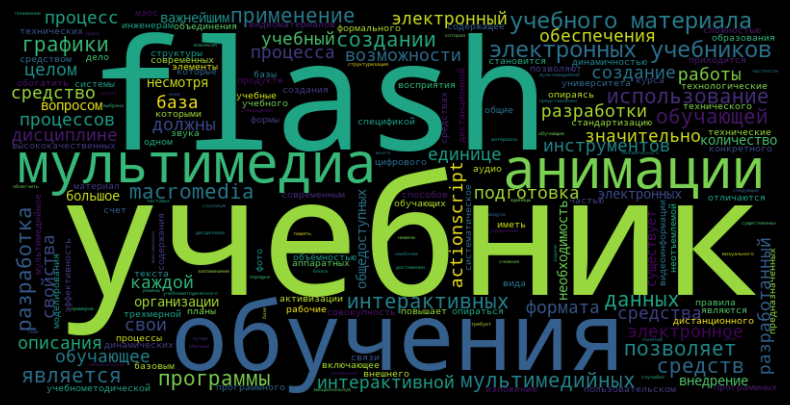

In [9]:
generate_wordcoud(full_word)

–ü—Ä–æ–≤–µ—Ä–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª–∏–Ω—ã —Ç–µ–∫—Å—Ç–æ–≤ –∏ —Ä–∞–∑–º–µ—Ç–æ–∫ (annotation)

In [10]:
# —Å–ª–æ–≤–∞—Ä—å –¥–ª—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –¥–ª–∏–Ω—ã —Ç–µ–∫—Å—Ç–æ–≤
text_stats = defaultdict(int)
# —Å–ª–æ–≤–∞—Ä—å –¥–ª—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –¥–ª–∏–Ω—ã —Ç–µ–∫—Å—Ç–æ–≤ –±–µ–∑ —Å–ø–µ—Ü —Å–∏–º–≤–æ–ª–æ–≤
text_spec_stats = defaultdict(int)
# –ø—Ä–æ—Ö–æ–¥–∏–º—Å—è –ø–æ –∫–∞–∂–¥–æ–π —Å—Ç—Ä–æ–∫–µ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞
for i in range(df.shape[0]):
    # –ø–æ–ª—É—á–∞–µ–º –ø—É—Ç—å –∫ —Ñ–∞–π–ª—É –∫ —Ç–µ–∫—Å—Ç—É
    text_path = df.loc[i]['text']
    # —á–∏—Ç–∞–µ–º —Ñ–∞–π–ª –∫ —Ç–µ–∫—Å—Ç—É
    with open(text_path, 'r', encoding='utf-8') as file:
        # –ø–æ–ª—É—á–∞–µ–º —Ç–µ–∫—Å—Ç
        text = file.read()
        # –æ–±–Ω–æ–≤–ª—è–µ–º —Å–ª–æ–≤–∞—Ä—å —Å —Å–ø–µ—Ü —Å–∏–º–≤–æ–ª–∞–º–∏
        text_stats[i] = len(text)
        # –æ–±–Ω–æ–≤–ª—è–µ–º —Å–ª–æ–≤–∞—Ä—å –±–µ–∑ —Å–ø–µ—Ü —Å–∏–º–≤–æ–ª–æ–≤
        text_spec_stats[i] = len(re.sub(r'[{}]'.format(string.punctuation), '',text))

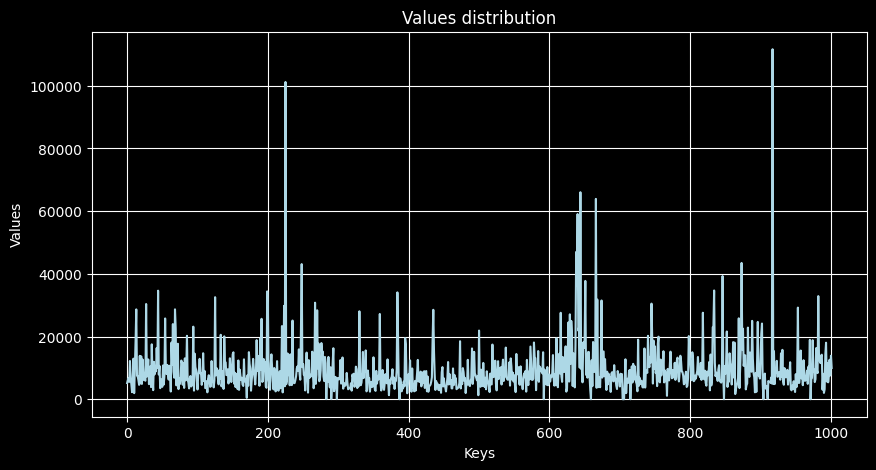

Counts: 1002
Min: 0
Mean: 9244.45
Max: 111644


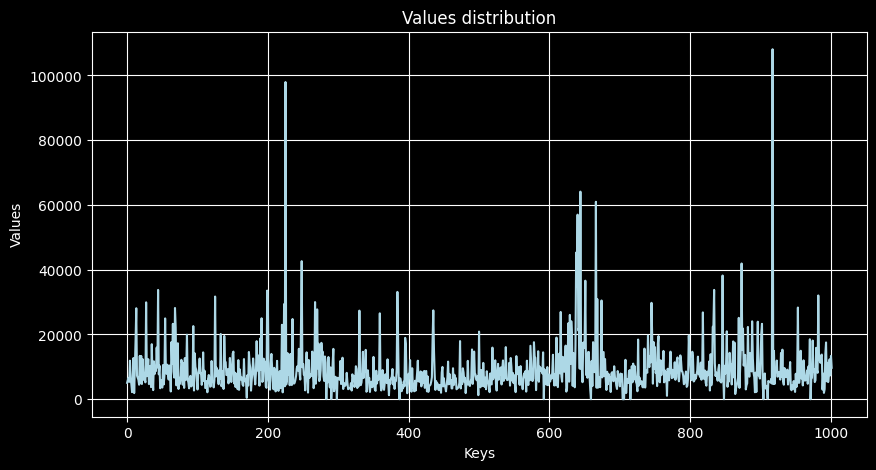

Counts: 1002
Min: 0
Mean: 8970.66
Max: 108116


In [11]:
# –≥—Ä–∞—Ñ–∏–∫ –¥–ª—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ —Å–æ —Å–ø–µ—Ü —Å–∏–º–≤–æ–ª–∞–º–∏
see_distribution(text_stats, graph_type='plot', grid=True)
# # –≥—Ä–∞—Ñ–∏–∫ –¥–ª—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –±–µ–∑ —Å–ø–µ—Ü —Å–∏–º–≤–æ–ª–æ–≤
see_distribution(text_spec_stats, graph_type='plot', grid=True)

–ü–æ–ø—Ä–æ–±—É–µ–º –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞—Ç—å –Ω–∞—à–∏ –≥—Ä–∞—Ñ–∏–∫–∏

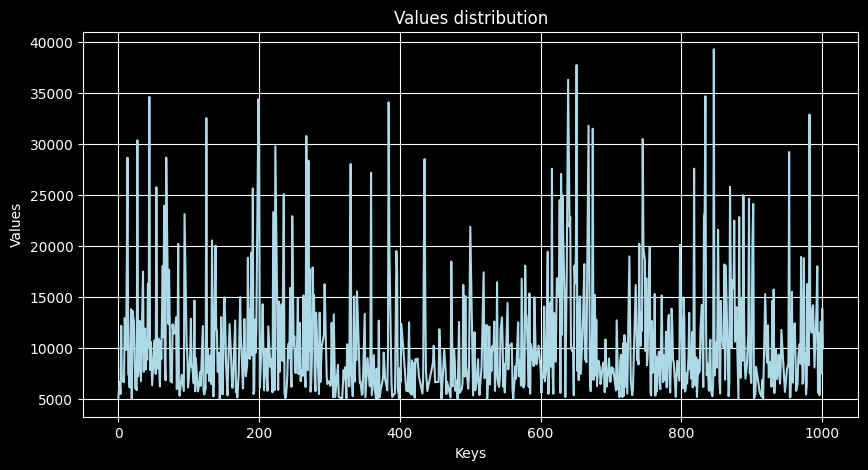

Counts: 748
Min: 5007
Mean: 10515.11
Max: 39291


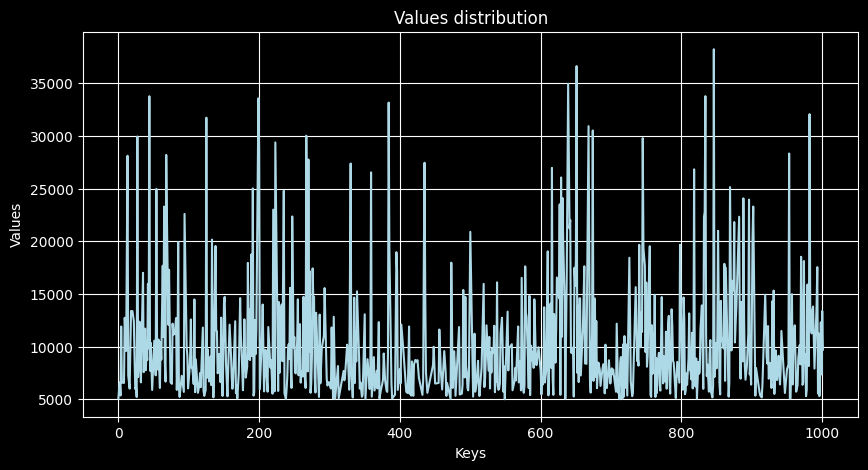

Counts: 732
Min: 5003
Mean: 10321.56
Max: 38218


In [12]:
# –≥—Ä–∞—Ñ–∏–∫ –¥–ª—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ —Å–æ —Å–ø–µ—Ü —Å–∏–º–≤–æ–ª–∞–º–∏
see_distribution({k: v for k, v in text_stats.items() if 5000 < v < 40000}, graph_type='plot')
# # –≥—Ä–∞—Ñ–∏–∫ –¥–ª—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –±–µ–∑ —Å–ø–µ—Ü —Å–∏–º–≤–æ–ª–æ–≤
see_distribution({k: v for k, v in text_spec_stats.items() if 5000 < v < 40000}, graph_type='plot')

In [13]:
# —Å–ª–æ–≤–∞—Ä—å –¥–ª—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –¥–ª–∏–Ω—ã –∞–Ω–Ω–æ—Ç–∞–∏—Ü–∏–π
annot_stats = defaultdict(int)
# —Å–ª–æ–≤–∞—Ä—å –¥–ª—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –¥–ª–∏–Ω—ã –∞–Ω–Ω–æ—Ç–∞—Ü–∏–π –±–µ–∑ —Å–ø–µ—Ü —Å–∏–º–≤–æ–ª–æ–≤
annot_spec_stats = defaultdict(int)
# –ø—Ä–æ—Ö–æ–¥–∏–º—Å—è –ø–æ –∫–∞–∂–¥–æ–π —Å—Ç—Ä–æ–∫–µ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞
for i in range(df.shape[0]):
    # –ø–æ–ª—É—á–∞–µ–º –ø—É—Ç—å –∫ —Ñ–∞–π–ª—É –∫ –∞–Ω–Ω–æ—Ç–∞—Ü–∏–∏
    text_path = df.loc[i]['annotation']
    # —á–∏—Ç–∞–µ–º —Ñ–∞–π–ª –∫ –∞–Ω–Ω–æ—Ç–∞—Ü–∏–∏
    with open(text_path, 'r', encoding='utf-8') as file:
        # –ø–æ–ª—É—á–∞–µ–º –∞–Ω–Ω–æ—Ç–∞—Ü–∏—é
        annot = file.read()
        # –æ–±–Ω–æ–≤–ª—è–µ–º —Å–ª–æ–≤–∞—Ä—å —Å —Å–ø–µ—Ü —Å–∏–º–≤–æ–ª–∞–º–∏
        annot_stats[i] = len(annot)
        # –æ–±–Ω–æ–≤–ª—è–µ–º —Å–ª–æ–≤–∞—Ä—å –±–µ–∑ —Å–ø–µ—Ü —Å–∏–º–≤–æ–ª–æ–≤
        annot_spec_stats[i] = len(re.sub(r'[{}]'.format(string.punctuation), '',annot))

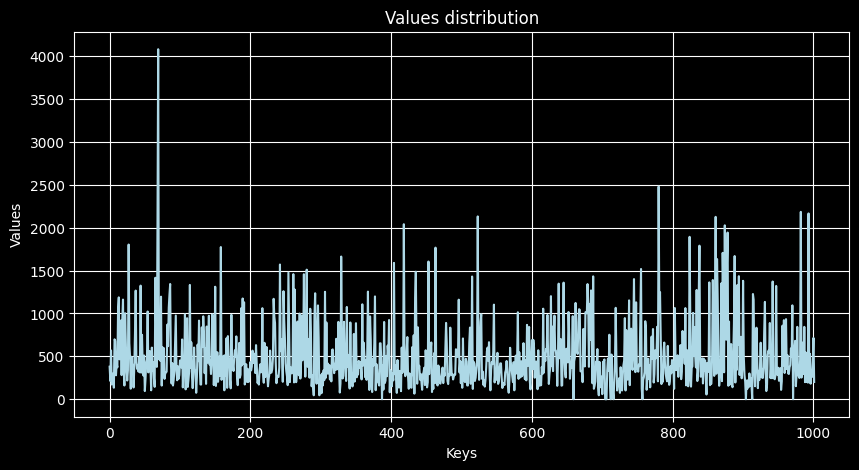

Counts: 1002
Min: 0
Mean: 495.30
Max: 4082


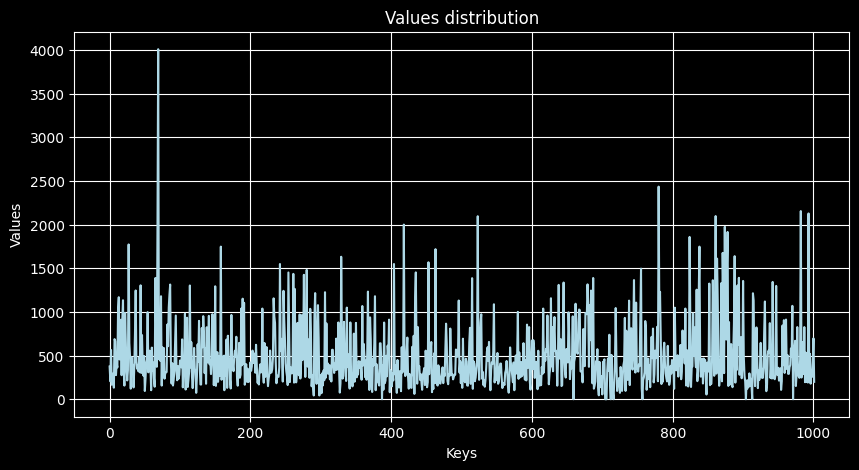

Counts: 1002
Min: 0
Mean: 485.56
Max: 4007


In [14]:
# –≥—Ä–∞—Ñ–∏–∫ –¥–ª—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ —Å–æ —Å–ø–µ—Ü —Å–∏–º–≤–æ–ª–∞–º–∏
see_distribution(annot_stats, graph_type='plot', grid=True)
# # –≥—Ä–∞—Ñ–∏–∫ –¥–ª—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –±–µ–∑ —Å–ø–µ—Ü —Å–∏–º–≤–æ–ª–æ–≤
see_distribution(annot_spec_stats, graph_type='plot', grid=True)

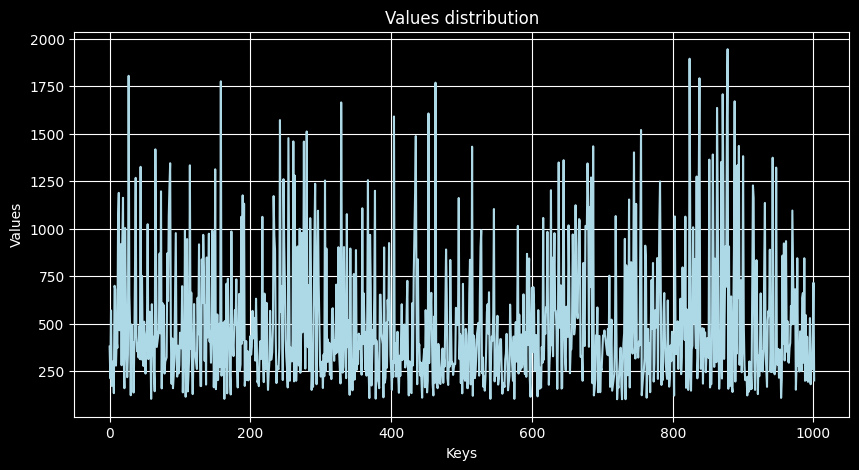

Counts: 963
Min: 102
Mean: 491.81
Max: 1944


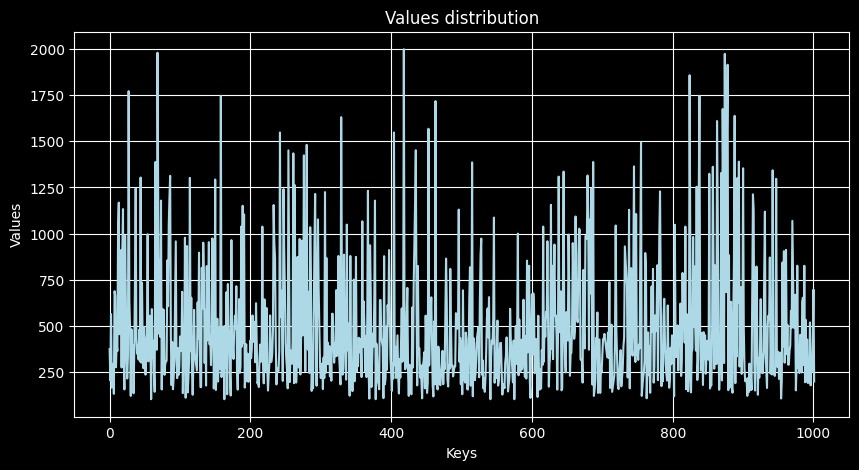

Counts: 963
Min: 103
Mean: 488.05
Max: 1999


In [15]:
# –≥—Ä–∞—Ñ–∏–∫ –¥–ª—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ —Å–æ —Å–ø–µ—Ü —Å–∏–º–≤–æ–ª–∞–º–∏
see_distribution({k: v for k, v in annot_stats.items() if 100 < v < 2000}, graph_type='plot')
# # –≥—Ä–∞—Ñ–∏–∫ –¥–ª—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –±–µ–∑ —Å–ø–µ—Ü —Å–∏–º–≤–æ–ª–æ–≤
see_distribution({k: v for k, v in annot_spec_stats.items() if 100 < v < 2000}, graph_type='plot')